In [1]:
# Transformers installation
!pip install transformers datasets
!pip install transformers[torch]
!pip install accelerate -U
! pip install -U transformers

# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [5]:
# Load model directly
from transformers import AutoProcessor, AutoModelForCausalLM

processor = AutoProcessor.from_pretrained("Adesh696/git-base-flickr8k")
model = AutoModelForCausalLM.from_pretrained("Adesh696/git-base-flickr8k")

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

For Inference use [aharma/flickr30k_dogs_and_babies_128](https://huggingface.co/datasets/aharma/flickr30k_dogs_and_babies_128/viewer/default/test) test images.

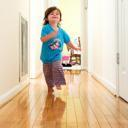

In [6]:
from PIL import Image
import requests

# url = "https://datasets-server.huggingface.co/cached-assets/aharma/flickr30k_dogs_and_babies_128/--/51db49748afca157c5593c9773773706c394a491/--/default/test/6/image/image.jpg"
url = "https://datasets-server.huggingface.co/cached-assets/aharma/flickr30k_dogs_and_babies_128/--/51db49748afca157c5593c9773773706c394a491/--/default/test/7/image/image.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [13]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values.to('cuda')
device

'cuda'

In [15]:
# Assuming your model is on GPU
model = model.to('cuda')
pixel_values = pixel_values.to('cuda')

# Generate captions
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)


a little girl in pajamas runs down a hall with hardwood floors.
